In [3]:
import pandas as pd
import kagglehub

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")
df = pd.read_csv("/Users/oneey/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1/creditcard_2023.csv")

In [5]:
y = df.Class
X = df.drop(['id', 'Class'], axis=1)

In [6]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X_scaled)

KMeans(n_clusters=2, random_state=0)

In [10]:
kmeans.cluster_centers_

array([[ 0.46914238, -0.44922226,  0.5732669 , -0.56393768,  0.39726278,
         0.38078183,  0.50028302, -0.16629638,  0.52084697,  0.59778953,
        -0.61578598,  0.64983277,  0.00867862,  0.63815687,  0.01883009,
         0.61654091,  0.5852373 ,  0.50143382, -0.33999848, -0.18421525,
        -0.09788721, -0.03918514, -0.0255978 ,  0.07373852, -0.02476924,
        -0.08609001, -0.20245174, -0.08241963, -0.00158946],
       [-0.75859276,  0.72638238, -0.9269598 ,  0.91187465, -0.64236505,
        -0.61571573, -0.80894648,  0.26889754, -0.84219794, -0.96661233,
         0.9957122 , -1.0507651 , -0.01403314, -1.03188542, -0.03044783,
        -0.99693291, -0.94631567, -0.81080731,  0.54976996,  0.29787196,
         0.15828144,  0.0633615 ,  0.04139107, -0.11923355,  0.04005132,
         0.13920562,  0.32735995,  0.13327071,  0.00257013]])

In [11]:
kmeans.inertia_


12183781.824818987

In [12]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 501588 out of 568630 samples were correctly labeled.


In [13]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Accuracy score: 0.88


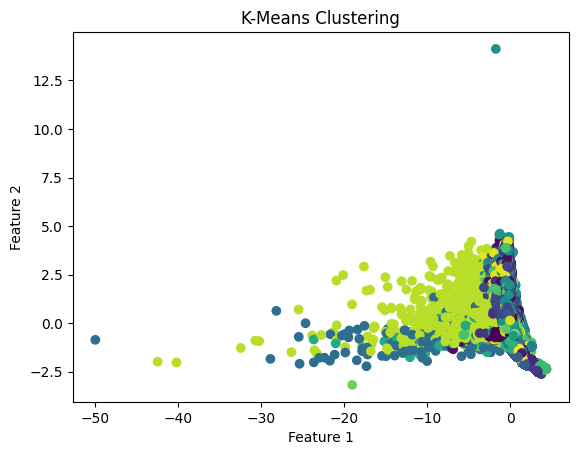

In [21]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()